In [1]:
import csky as cy

In [2]:
import pandas as pd
import histlite as hl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
cy.plotting.mrichman_mpl
import matplotlib as mpl
plt.rc('font', size=15)

In [4]:
mc = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/MC_NuGen_bfrv1_2153x.hdf')
snowstorm = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/systematics/SnowStorm_Spice321/MC_NuGen_snowstorm_214xx.hdf')

In [5]:
mu_muongun = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/MC_MuonGun_2131x.hdf')
mu_corsika = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/MC_CORSIKA_20904.hdf')

In [6]:
exps = pd.DataFrame()
years = np.arange(2011,2021,1)
for year in years:
    exp = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/IC86_{}_exp.hdf'.format(year))
    exps = pd.concat([exps, exp])

In [7]:
exp = exps

In [8]:
plot_dir = cy.utils.ensure_dir('/home/ssclafani/plots/paperplots/fig_data_mc/')

In [9]:
for k in mc.keys():
    if 'one' in k:
        print(k)

BDT_astroness_bdt_mu0100_cscd0000_01_pred_000
BDT_astroness_bdt_mu0100_cscd0000_01_runtime_prediction
BDT_astroness_bdt_mu0100_cscd0000_01_runtime_preprocess
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_pred_000
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_runtime_prediction
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_runtime_preprocess
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_pred_000
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_runtime_prediction
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_runtime_preprocess
BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_pred_000
BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_runtime_prediction
BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_runtime_preprocess


In [10]:
for k in mc.keys():
    if 'weight' in k:
        print(k)

weights_MCEq_H3a_sibyll2_3c_conv
weights_MCEq_H3a_sibyll2_3c_pr
weights_MCEq_H3a_sibyll2_3c_total
weights_aachen_flux
weights_aachen_flux_8yr
weights_cscd_hans
weights_cscd_icrc15
weights_global_fit
weights_hese4_bestfit
weights_hese4_fixed
weights_hese6
weights_hese_flux
weights_mese_flux
weights_meta_info_n_events_per_run
weights_meta_info_n_files
weights
weights_livetime


In [11]:
for k in mc.keys():
    if 'veto' in k:
        print(k)

nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv
nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_pr
nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total


In [12]:
for k in mc.keys():
    if 'pf' in k:
        print(k)

nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv
nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_pr
nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total


In [13]:
lt = mc.weights_livetime[0]

In [14]:
colors = ['#FF7F0E', '#0B3D53', '#5C9FC9', ]

In [15]:
#psuedofit for no snowstorm

mu_norm_corsika = 0.407
mu_norm_muongun = 0.137
conv_norm = 1.1665
astro_norm = 1.65e-18
nu_gamma = 2.58


In [16]:
sorted(mc.keys())

['BDT_astroness_bdt_mu0100_cscd0000_01_pred_000',
 'BDT_astroness_bdt_mu0100_cscd0000_01_runtime_prediction',
 'BDT_astroness_bdt_mu0100_cscd0000_01_runtime_preprocess',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_pred_000',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_runtime_prediction',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_runtime_preprocess',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_pred_000',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_runtime_prediction',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_runtime_preprocess',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_pred_000',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_runtime_prediction',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_runtime_preprocess',
 'BDT_bdt_max_depth_4_n_est_1000lr_0.01_seed_3_train_size_50_pred_000',
 'BDT_bdt_max_depth_4_n_est_1000lr_0.01_seed_3_train_size_50_pred_001',
 'BDT_bdt_max_depth_4_n_est_1000lr_0.01_seed_3_train_size_50_runt

In [17]:
print(sum(mc.weights_MCEq_H3a_sibyll2_3c_total)*lt)
print(sum(mc.weights_cscd_hans)*lt)
print(sum( astro_norm * mc.ow* (mc.trueE/1e5)**-nu_gamma)*lt)

51183.86899052471
3999.308508127831
4577.0894815857


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


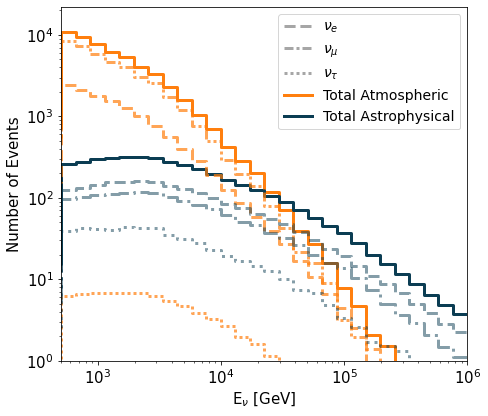

In [18]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(7,6))
fig.set_facecolor('w')

nue_mask = np.abs(mc.MCPrimary_pdg_encoding) == 12
numu_mask = np.abs(mc.MCPrimary_pdg_encoding) == 14
nutau_mask = np.abs(mc.MCPrimary_pdg_encoding) == 16

bins = np.logspace(2,6,35)
atmo_nue = hl.hist(mc[nue_mask].energy, 
                     weights = conv_norm* mc[nue_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[nue_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_nue = hl.hist(mc[nue_mask].energy, 
                     weights = lt*mc[nue_mask].weights_cscd_hans, log=True, bins=bins)

atmo_numu = hl.hist(mc[numu_mask].energy, 
                     weights = conv_norm* mc[numu_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[numu_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_numu = hl.hist(mc[numu_mask].energy, 
                     weights = lt*mc[numu_mask].weights_cscd_hans, log=True, bins=bins)

atmo_nutau = hl.hist(mc[nutau_mask].energy, 
                     weights = conv_norm* mc[nutau_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[nutau_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_nutau = hl.hist(mc[nutau_mask].energy, 
                     weights = lt*mc[nutau_mask].weights_cscd_hans, log=True, bins=bins)

hl.plot1d(ax, atmo_nue + atmo_numu +atmo_nutau, label=r'Total Atmospheric', color=colors[0], lw=3, ls='-', alpha=1, )
       
hl.plot1d(ax, astro_nue+astro_numu + astro_nutau, label=r'Total Astrophysical', color=colors[1], lw=3, ls='-', alpha=1 )

hl.plot1d(ax, atmo_nue,  color=colors[0], lw=3, ls='--', alpha=0.7, )
hl.plot1d(ax, atmo_numu,  color=colors[0], lw=3, ls=(0, (3, 1, 1, 1, 1, 1)), alpha=0.7)
hl.plot1d(ax, atmo_nutau, color=colors[0], lw=3 ,ls = (0, (1, 1)), alpha=0.7)
#plt.plot(np.nan, np.nan, label=r'MC $\nu$', color=colors[0], lw=4, ls='-', alpha=1 )



plt.plot(np.nan, np.nan, label=r'$\nu_e$', color='grey', lw=3, ls='--', alpha=0.7, )
plt.plot(np.nan, np.nan, label=r'$\nu_\mu$', color='grey', lw=3,  ls=(0, (3, 1, 1, 1)), alpha=0.7, )
plt.plot(np.nan, np.nan, label=r'$\nu_\tau$', color='grey', lw=3,ls = (0, (1, 1)),  alpha=0.7, )

hl.plot1d(ax, astro_nue,  color=colors[1], lw=3, ls='--', alpha=0.5)
hl.plot1d(ax, astro_numu,  color=colors[1], lw=3, ls=':', alpha=0.5)
hl.plot1d(ax, astro_nutau,  color=colors[1], lw=3, ls='-.', alpha=0.5)




plt.rc('font', size=14)
ax.loglog()
plt.legend(ncol=1)
ax.set_xlim(500,1e6)
ax.set_ylim(1,22000)
ax.set_xlabel(r'E$_\nu$ [GeV]')
ax.set_ylabel('Number of Events')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'Expected_Events_atmvastro')

In [19]:
plasma = plt.get_cmap('plasma')
plasma(5)
viridis = plt.get_cmap('viridis')
cmap = plt.get_cmap('RdBu')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


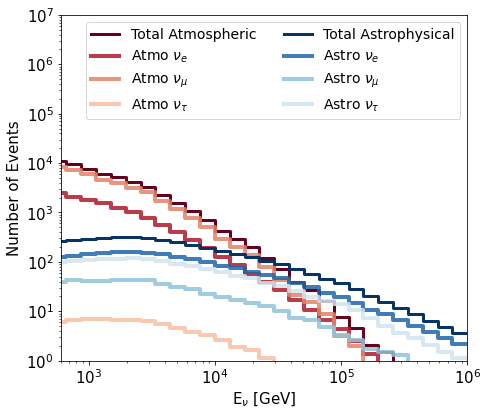

In [20]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(7,6))
fig.set_facecolor('w')

nue_mask = np.abs(mc.MCPrimary_pdg_encoding) == 12
numu_mask = np.abs(mc.MCPrimary_pdg_encoding) == 14
nutau_mask = np.abs(mc.MCPrimary_pdg_encoding) == 16

bins = np.logspace(2,6,35)
atmo_nue = hl.hist(mc[nue_mask].energy, 
                     weights = conv_norm* mc[nue_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[nue_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_nue = hl.hist(mc[nue_mask].energy, 
                     weights = lt*mc[nue_mask].weights_cscd_hans, log=True, bins=bins)

atmo_numu = hl.hist(mc[numu_mask].energy, 
                     weights = conv_norm* mc[numu_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[numu_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_numu = hl.hist(mc[numu_mask].energy, 
                     weights = lt*mc[numu_mask].weights_cscd_hans, log=True, bins=bins)

atmo_nutau = hl.hist(mc[nutau_mask].energy, 
                     weights = conv_norm* mc[nutau_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[nutau_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_nutau = hl.hist(mc[nutau_mask].energy, 
                     weights = lt*mc[nutau_mask].weights_cscd_hans, log=True, bins=bins)

hl.plot1d(ax, atmo_nue + atmo_numu +atmo_nutau, label=r'Total Atmospheric', color=cmap(0), lw=3, ls = '-', alpha=1, )
       
hl.plot1d(ax, atmo_nue,  color=cmap(.1), label = r'Atmo $\nu_e$',lw=4, ls = '-', alpha=0.85)
hl.plot1d(ax, atmo_numu,  color=cmap(.25),label = r'Atmo $\nu_\mu$',  lw=4, ls ='-', alpha=0.85)
hl.plot1d(ax, atmo_nutau, color=cmap(.35), label= r'Atmo $\nu_\tau$', lw=4 ,ls = '-', alpha=0.85)
#plt.plot(np.nan, np.nan, label=r'MC $\nu$', color=colors[0], lw=4, ls='-', alpha=1 )

hl.plot1d(ax, astro_nue+astro_numu + astro_nutau, label=r'Total Astrophysical', color=cmap(.99), lw=3, ls = '-', alpha=1 ,zorder=10)


#plt.plot(np.nan, np.nan, label=r'$\nu_e$', color='grey', lw=3, ls='--', alpha=0.7, )
#plt.plot(np.nan, np.nan, label=r'$\nu_\mu$', color='grey', lw=3,  ls='--' alpha=0.7, )
#plt.plot(np.nan, np.nan, label=r'$\nu_\tau$', color='grey', lw=3,ls ='--',  alpha=0.7, )

hl.plot1d(ax, astro_nue, label = r'Astro $\nu_e$', color=cmap(.9), lw=4, ls = '-',  alpha=0.85,zorder=10)
hl.plot1d(ax, astro_numu,   label = r'Astro $\nu_\mu$', color=cmap(.7), lw=4 ,ls = '-',  alpha=0.85,zorder=10)
hl.plot1d(ax, astro_nutau,   label = r'Astro $\nu_\tau$', color=cmap(.6), lw=4, ls = '-',  alpha=0.85,zorder=10)




plt.rc('font', size=14)
ax.loglog()
plt.legend(ncol=2)
ax.set_xlim(600,1e6)
ax.set_ylim(1,1e7)
ax.set_xlabel(r'E$_\nu$ [GeV]')
ax.set_ylabel('Number of Events')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'Expected_Events_atmvastro')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


['Atmo $\\nu_e$', 'Atmo $\\nu_\\mu$', 'Atmo $\\nu_\\tau$', 'Astro $\\nu_e$', 'Astro $\\nu_\\mu$', 'Astro $\\nu_\\tau$', 'Total Atmospheric', 'Total Astrophysical']
-> /home/ssclafani/plots/paperplots/fig_data_mc//Expected_Events_atmvastro


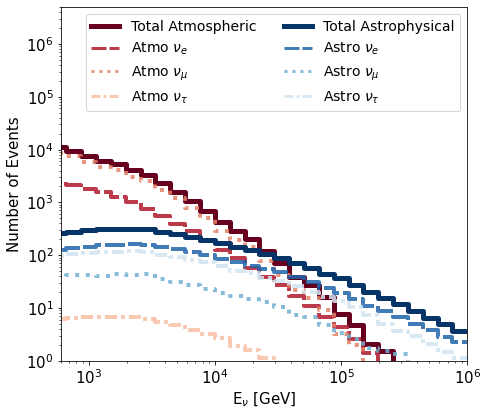

In [21]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(7,6))
fig.set_facecolor('w')

nue_mask = np.abs(mc.MCPrimary_pdg_encoding) == 12
numu_mask = np.abs(mc.MCPrimary_pdg_encoding) == 14
nutau_mask = np.abs(mc.MCPrimary_pdg_encoding) == 16

bins = np.logspace(2,6,35)
atmo_nue = hl.hist(mc[nue_mask].energy, 
                     weights = conv_norm* mc[nue_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[nue_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_nue = hl.hist(mc[nue_mask].energy, 
                     weights = lt*mc[nue_mask].weights_cscd_hans, log=True, bins=bins)

atmo_numu = hl.hist(mc[numu_mask].energy, 
                     weights = conv_norm* mc[numu_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[numu_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_numu = hl.hist(mc[numu_mask].energy, 
                     weights = lt*mc[numu_mask].weights_cscd_hans, log=True, bins=bins)

atmo_nutau = hl.hist(mc[nutau_mask].energy, 
                     weights = conv_norm* mc[nutau_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[nutau_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_nutau = hl.hist(mc[nutau_mask].energy, 
                     weights = lt*mc[nutau_mask].weights_cscd_hans, log=True, bins=bins)

hl.plot1d(ax, atmo_nue + atmo_numu +atmo_nutau, label=r'Total Atmospheric', color=cmap(0), lw=5, ls = '-', alpha=1, zorder=15)
       
hl.plot1d(ax, atmo_nue,  color=cmap(.1),lw=4, ls = (0, (5, 1)), alpha=0.85)
hl.plot1d(ax, atmo_numu,  color=cmap(.25),lw=4, ls =':', alpha=0.85)
hl.plot1d(ax, atmo_nutau, color=cmap(.35), lw=4,ls=(0, (3, 1, 1, 1)), alpha=0.85)
#plt.plot(np.nan, np.nan, label=r'MC $\nu$', color=colors[0], lw=4, ls='-', alpha=1 )


plt.plot(np.nan, np.nan,color=cmap(.1), label = r'Atmo $\nu_e$',lw=3, ls = (0, (5, 1)), alpha=0.85)
plt.plot(np.nan, np.nan, color=cmap(.25),label = r'Atmo $\nu_\mu$',  lw=3, ls =':', alpha=0.85)
plt.plot(np.nan, np.nan, color=cmap(.35), label= r'Atmo $\nu_\tau$', lw=3,ls=(0, (3, 1, 1, 1)), alpha=0.85)

hl.plot1d(ax, astro_nue+astro_numu + astro_nutau, label=r'Total Astrophysical', color=cmap(.99), lw=5, ls = '-', alpha=1 ,zorder=15)


plt.plot(np.nan, np.nan, label = r'Astro $\nu_e$', color=cmap(.9), lw=3, ls = (0, (5, 1)) , alpha=0.85,)
plt.plot(np.nan, np.nan, label = r'Astro $\nu_\mu$', color=cmap(.74), lw=3 ,ls = ':',  alpha=0.85,)
plt.plot(np.nan, np.nan,  label = r'Astro $\nu_\tau$', color=cmap(.6),lw=3,  ls=(0, (3, 1, 1, 1)),  alpha=0.85, )

hl.plot1d(ax, astro_nue,color=cmap(.9), lw=4, ls = (0, (5, 1)) , alpha=0.85,zorder=10)
hl.plot1d(ax, astro_numu,  color=cmap(.74), lw=4 ,ls = ':',  alpha=0.85,zorder=10)
hl.plot1d(ax, astro_nutau,    color=cmap(.6),lw=4,  ls=(0, (3, 1, 1, 1)),  alpha=0.85,zorder=10)
handles, labels = plt.gca().get_legend_handles_labels()
print(labels)
order = [6,0,1,2,7,3,4,5]
plt.rc('font', size=14)
ax.loglog()
#ax.legend(ncol=2)
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncol=2) 
ax.set_xlim(600,1e6)
ax.set_ylim(1,5e6)
ax.set_xlabel(r'E$_\nu$ [GeV]')
ax.set_ylabel('Number of Events')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'Expected_Events_atmvastro')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


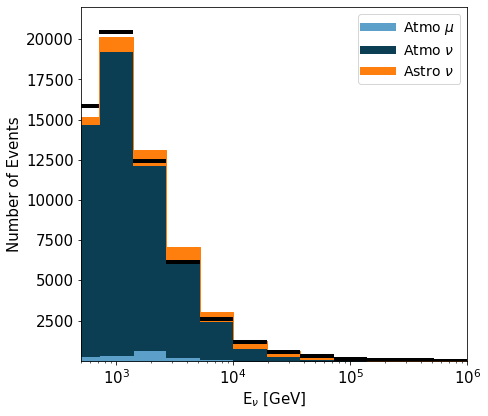

In [22]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(7,6))
fig.set_facecolor('w')

#nue_mask = np.abs(mc.MCPrimary_pdg_encoding) == 12
#numu_mask = np.abs(mc.MCPrimary_pdg_encoding) == 14
#nutau_mask = np.abs(mc.MCPrimary_pdg_encoding) == 16

bins = np.logspace(2,6,15)
atmo = hl.hist(mc.energy, 
                     weights = conv_norm* mc.weights_MCEq_H3a_sibyll2_3c_total*mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro = hl.hist(mc.energy, 
                     weights = lt*astro_norm * mc.ow* (mc.trueE/1e5)**-nu_gamma, log=True, bins=bins)
muhist_c = hl.hist(mu_corsika.energy, 
                     weights = mu_norm_corsika * mu_corsika.weights, log=True, bins=bins)
muhist_m = hl.hist(mu_muongun.energy, 
                     weights = mu_norm_muongun * mu_muongun.weights, log=True, bins=bins)
#hl.plot1d(ax, atmo+astro, color=colors[0], lw=3, ls='-', alpha=1, vectorized=True)
hl.stack1d(ax, [muhist_c + muhist_m, atmo, astro], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'
                  ])

d = hl.hist(exps.energy.values, log=True, bins=bins)
hl.plot1d(ax, d, crosses=True, color='k', lw=4)
#hl.plot1d(ax, atmo_nue, label=r'Atmospheric $\nu_e$', color=colors[0], lw=3, ls='--', alpha=0.7, )
#hl.plot1d(ax, atmo_numu, label=r'Atmospheric $\nu_\mu$', color=colors[0], lw=3, ls=(0, (3, 1, 1, 1, 1, 1)), alpha=0.7)
#hl.plot1d(ax, atmo_nutau, label=r'Atmospheric $\nu_\tau$', color=colors[0], lw=3 ,ls = (0, (1, 1)), alpha=0.7)
#plt.plot(np.nan, np.nan, label=r'MC $\nu$', color=colors[0], lw=4, ls='-', alpha=1 )



#plt.plot(np.nan, np.nan, label=r'$\nu_e$', color='grey', lw=3, ls='--', alpha=0.7, )
#plt.plot(np.nan, np.nan, label=r'$\nu_\mu$', color='grey', lw=3,  ls=(0, (3, 1, 1, 1)), alpha=0.7, )
#plt.plot(np.nan, np.nan, label=r'$\nu_\tau$', color='grey', lw=3,ls = (0, (1, 1)),  alpha=0.7, )
#hl.plot1d(ax, astro_nutau+atmo_nutau, label=r'Astrophysical $\nu_\tau$', color=colors[1], lw=3, ls=':', alpha=0.5)
plt.rc('font', size=14)
ax.semilogx()
plt.legend(ncol=1)
ax.set_xlim(500,1e6)
ax.set_ylim(1,22000)
ax.set_xlabel(r'E$_\nu$ [GeV]')
ax.set_ylabel('Number of Events')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'sata_mc_')

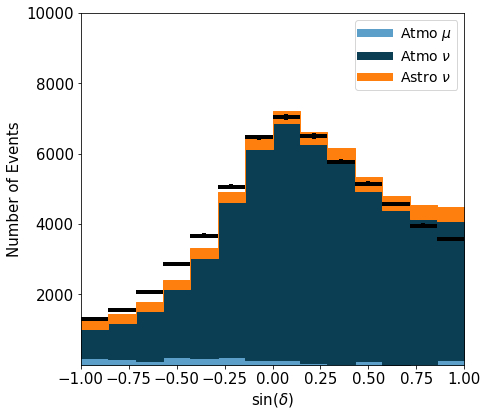

In [23]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(7,6))
fig.set_facecolor('w')

#nue_mask = np.abs(mc.MCPrimary_pdg_encoding) == 12
#numu_mask = np.abs(mc.MCPrimary_pdg_encoding) == 14
#nutau_mask = np.abs(mc.MCPrimary_pdg_encoding) == 16

bins = np.linspace(-1,1,15)
atmo = hl.hist(np.sin(mc.dec), 
                     weights =conv_norm* mc.weights_MCEq_H3a_sibyll2_3c_total*mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total*lt, 
                     log=False, bins=bins)

astro = hl.hist(np.sin(mc.dec), 
                     weights = lt*astro_norm * mc.ow* (mc.trueE/1e5)**-nu_gamma, log=True, bins=bins)
muhist_c = hl.hist(np.sin(mu_corsika.dec), 
                     weights = mu_norm_corsika * mu_corsika.weights, log=True, bins=bins)
muhist_m = hl.hist(np.sin(mu_muongun.dec), 
                     weights = mu_norm_muongun * mu_muongun.weights, log=True, bins=bins)


#hl.plot1d(ax, atmo+astro, color=colors[0], lw=3, ls='-', alpha=1, vectorized=True)
hl.stack1d(ax, [muhist_c+muhist_m, atmo, astro], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'
                  ])

d = hl.hist(np.sin(exps.dec.values), log=True, bins=bins)
hl.plot1d(ax, d, crosses=True, color='k', lw=4)
#hl.plot1d(ax, atmo_nue, label=r'Atmospheric $\nu_e$', color=colors[0], lw=3, ls='--', alpha=0.7, )
#hl.plot1d(ax, atmo_numu, label=r'Atmospheric $\nu_\mu$', color=colors[0], lw=3, ls=(0, (3, 1, 1, 1, 1, 1)), alpha=0.7)
#hl.plot1d(ax, atmo_nutau, label=r'Atmospheric $\nu_\tau$', color=colors[0], lw=3 ,ls = (0, (1, 1)), alpha=0.7)
#plt.plot(np.nan, np.nan, label=r'MC $\nu$', color=colors[0], lw=4, ls='-', alpha=1 )



#plt.plot(np.nan, np.nan, label=r'$\nu_e$', color='grey', lw=3, ls='--', alpha=0.7, )
#plt.plot(np.nan, np.nan, label=r'$\nu_\mu$', color='grey', lw=3,  ls=(0, (3, 1, 1, 1)), alpha=0.7, )
#plt.plot(np.nan, np.nan, label=r'$\nu_\tau$', color='grey', lw=3,ls = (0, (1, 1)),  alpha=0.7, )
#hl.plot1d(ax, astro_nutau+atmo_nutau, label=r'Astrophysical $\nu_\tau$', color=colors[1], lw=3, ls=':', alpha=0.5)
plt.rc('font', size=14)
#ax.semilogy()
plt.legend(ncol=1)
ax.set_xlim(-1,1)
ax.set_ylim(1,1e4)
ax.set_xlabel(r'sin($\delta$)')
ax.set_ylabel('Number of Events')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'data_mc_sindec')

Text(0, 0.5, 'Number of Events')

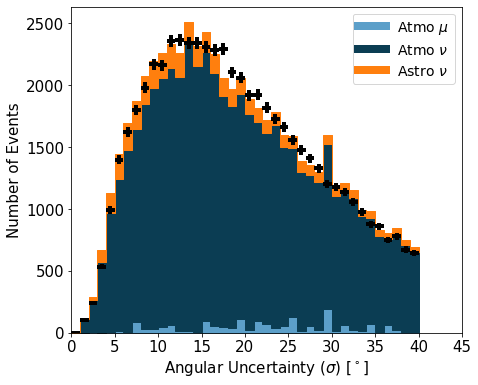

In [24]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(7,6))
fig.set_facecolor('w')

#nue_mask = np.abs(mc.MCPrimary_pdg_encoding) == 12
#numu_mask = np.abs(mc.MCPrimary_pdg_encoding) == 14
#nutau_mask = np.abs(mc.MCPrimary_pdg_encoding) == 16

bins = np.linspace(0,40,41)
#bins = np.logspace(1,2,40)
atmo = hl.hist(np.degrees(mc.angErr), 
                     weights =conv_norm* mc.weights_MCEq_H3a_sibyll2_3c_total*mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total*lt, 
                     log=False, bins=bins)

astro = hl.hist(np.degrees(mc.angErr), 
                     weights = lt*astro_norm * mc.ow* (mc.trueE/1e5)**-nu_gamma, log=True, bins=bins)
muhist_c = hl.hist(np.degrees(mu_corsika.angErr), 
                     weights = mu_norm_corsika * mu_corsika.weights, log=True, bins=bins)
muhist_m = hl.hist(np.degrees(mu_muongun.angErr), 
                     weights = mu_norm_muongun * mu_muongun.weights, log=True, bins=bins)


#hl.plot1d(ax, atmo+astro, color=colors[0], lw=3, ls='-', alpha=1, vectorized=True)
hl.stack1d(ax, [muhist_c+muhist_m, atmo, astro], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'
                  ])

d = hl.hist(np.degrees(exps.angErr.values), log=True, bins=bins)
hl.plot1d(ax, d, crosses=True, color='k', lw=4)
plt.rc('font', size=14)
#ax.semilogy()
plt.legend(ncol=1)

ax.set_xlim(0,45)
ax.set_ylim(0)
ax.set_xlabel('Angular Uncertainty ($\sigma$) [$^\circ$]')
ax.set_ylabel('Number of Events')
#plt.tight_layout()


In [25]:
'''param_dict = {'MuonGun': 0.8840436592975727,
  'CORSIKA': 0.3587787441985797,
  'conv': 1.1249772901249662,
  'prompt': 0.9724765629602571,
  'astro': 1.0489233655711144e-18,
  'gamma': 2.3995593905426857,
  'Scattering': 0.9882435199378949,
  'Absorption': 1.0246767748869356,
  'AnisotropyScale': 1.4480472088238758,
  'DOMEfficiency': 1.011209576193338,
  'HoleIceForward_Unified_00': -0.16123362926589496,
  'HoleIceForward_Unified_01': -0.020261791223871506}'''

"param_dict = {'MuonGun': 0.8840436592975727,\n  'CORSIKA': 0.3587787441985797,\n  'conv': 1.1249772901249662,\n  'prompt': 0.9724765629602571,\n  'astro': 1.0489233655711144e-18,\n  'gamma': 2.3995593905426857,\n  'Scattering': 0.9882435199378949,\n  'Absorption': 1.0246767748869356,\n  'AnisotropyScale': 1.4480472088238758,\n  'DOMEfficiency': 1.011209576193338,\n  'HoleIceForward_Unified_00': -0.16123362926589496,\n  'HoleIceForward_Unified_01': -0.020261791223871506}"

In [26]:
param_dict = {'MuonGun': 1.0102142477713796,
  'CORSIKA': 0.999827120479659,
  'conv': 1.070639237532574,
  'prompt': 0.9998272286111397,
  'astro': 1.66e-18,
  'gamma': 2.53,
  'Scattering': 1.0093173832699136,
  'Absorption': 1.0061007891935552,
  'AnisotropyScale': 1.4658285268551388,
  'DOMEfficiency': 0.9797673150658852,
  'HoleIceForward_Unified_00': -0.27374906081019124,
  'HoleIceForward_Unified_01': 0.0003714552551419559}

In [27]:
'''param_dict = {'MuonGun': 1.0016545684905376,
  'CORSIKA': 0.999993202618599,
  'conv': 1.0134685305019888,
  'prompt': 1.0002013759006432,
  'astro': 1.0013854430620327e-18,
  'gamma': 2.600009490851799,
  'Scattering': 0.9882435199378949,
  'Absorption': 1.0246767748869356,
  'AnisotropyScale': 1.4480472088238758,
  'DOMEfficiency': 1.011209576193338,
  'HoleIceForward_Unified_00': -0.16095480777547955,
  'HoleIceForward_Unified_01': -0.0192235412748909}'''

"param_dict = {'MuonGun': 1.0016545684905376,\n  'CORSIKA': 0.999993202618599,\n  'conv': 1.0134685305019888,\n  'prompt': 1.0002013759006432,\n  'astro': 1.0013854430620327e-18,\n  'gamma': 2.600009490851799,\n  'Scattering': 0.9882435199378949,\n  'Absorption': 1.0246767748869356,\n  'AnisotropyScale': 1.4480472088238758,\n  'DOMEfficiency': 1.011209576193338,\n  'HoleIceForward_Unified_00': -0.16095480777547955,\n  'HoleIceForward_Unified_01': -0.0192235412748909}"

In [28]:
def rename_snowstorm_params(df):
    parameter_names=[
        'Scattering', 'Absorption', 'AnisotropyScale', 
        'DOMEfficiency', 'HoleIceForward_Unified_00', 
        'HoleIceForward_Unified_01',
    ]
    for i, param in enumerate(parameter_names):
        df[param] = df['SnowstormParameters_{:05d}'.format(i)]

In [29]:
def gauss(x, mu, sigma):
    """Gaussian PDF

    Parameters
    ----------
    x : array_like
        The input tensor.
    mu : array_like
        Mu parameter of Gaussian.
    sigma : array_like
        Sigma parameter of Gaussian.

    Returns
    -------
    array_like
        The Gaussian PDF evaluated at x
    """
    return np.exp(-0.5*((x - mu) / sigma)**2) / (2*np.pi*sigma**2)**0.5

In [30]:
w = 1.
snowstorm_priors_width = {
    'Scattering': 0.05*w,
    'Absorption': 0.05*w,
    'AnisotropyScale': 0.5*w,
    'DOMEfficiency': 0.05*w,
    'HoleIceForward_Unified_00': 0.5*w,
    'HoleIceForward_Unified_01': 0.1*w,
}

snowstorm_simulation_range = {
    'Scattering': [0.9, 1.1],
    'Absorption': [0.9, 1.1],
    'AnisotropyScale': [0., 2.],
    'DOMEfficiency': [0.9, 1.1],
    'HoleIceForward_Unified_00': [-1.0, 1.0],
    'HoleIceForward_Unified_01': [-0.2, 0.2],
}

def get_multiplier_from_params(df, params, use_gaussian=True, priors_width=snowstorm_priors_width):
    
    # extract SnowStorm priors
    priors_dict = {}
    for k, v in params.items():
        if k in snowstorm_simulation_range:
            priors_dict[k] = [params[k] - priors_width[k], params[k] + priors_width[k]]

    # get multipliers for set of systematic paramters
    if use_gaussian:
        snowstorm_multiplier = get_snowstorm_multiplier_gaussian(
            df=df, priors_dict=priors_dict,
        )
    else:
        snowstorm_multiplier = get_snowstorm_multiplier(
            df=df, priors_dict=priors_dict, verbose=False,
        )
    return snowstorm_multiplier

def get_snowstorm_multiplier_gaussian(
        df,
        priors_dict,
        simulation_range=snowstorm_simulation_range,
    ):
    """Reweight snowstorm with Gaussian
    
    Parameters
    ----------
    df: DataFrame or dict
        The dataframe or dictionary containing the SnowStorm
        parameters. 
    priors_dict : dict
        A dictionary with uniform Snowstorm priors defined
        as a tuple of (min, max). Gaussian will be placed in 
        center with 2-sigma corresponding to boundaries, i.e.
        sigma = (max - min) / 4.
    """
    w_multiplier = np.ones_like(df[list(simulation_range.keys())[0]])
    for name, prior in priors_dict.items():
        
        prior_orig = simulation_range[name]
        assert prior[1] >= prior[0] and prior_orig[1] >= prior_orig[0]
        assert prior[0] >= prior_orig[0] and prior[0] <= prior_orig[1]
        assert prior[1] >= prior_orig[0] and prior[1] <= prior_orig[1]
        
        range_sim = prior_orig[1] - prior_orig[0]
        range_new = prior[1] - prior[0]
        sigma = range_new / 4.
        mu = np.mean(prior)
        w_multiplier *= gauss(x=df[name], mu=mu, sigma=sigma)
    
    # normalize weights
    w_multiplier = w_multiplier / np.sum(w_multiplier) * len(w_multiplier)
    return w_multiplier

def get_snowstorm_multiplier(
        df,
        priors_dict,
        simulation_range=snowstorm_simulation_range,
        verbose=False,
    ):
    """Reweight snowstorm
    
    Parameters
    ----------
    df: DataFrame or dict
        The dataframe or dictionary containing the SnowStorm
        parameters. 
    priors_dict : dict
        A dictionary with uniform Snowstorm priors defined
        as a tuple of (min, max).
    """
    w_multiplier = 1.0
    mask = np.ones_like(df[list(simulation_range.keys())[0]], dtype=bool)
    for name, prior in priors_dict.items():
        
        prior_orig = simulation_range[name]
        assert prior[1] >= prior[0] and prior_orig[1] >= prior_orig[0]
        assert prior[0] >= prior_orig[0] and prior[0] <= prior_orig[1]
        assert prior[1] >= prior_orig[0] and prior[1] <= prior_orig[1]
        
        range_sim = prior_orig[1] - prior_orig[0]
        range_new = prior[1] - prior[0]
        w_multiplier *= range_sim / range_new
        mask = np.logical_and(mask, df[name] >= prior[0])
        mask = np.logical_and(mask, df[name] <= prior[1])
    
    
    snowstorm_multiplier = np.ones_like(mask) * mask.astype(float) * w_multiplier
    if verbose:
        print(np.sum(mask) / float(len(mask)), 1./w_multiplier, w_multiplier)
        print(np.sum(mask), len(mask), np.sum(snowstorm_multiplier))
    return snowstorm_multiplier

In [31]:
rename_snowstorm_params(snowstorm)
w_multiplier = get_multiplier_from_params(snowstorm, param_dict, use_gaussian=True)

In [32]:
sum(np.isnan(lt*param_dict['astro'] * mc.ow* (mc.trueE/1e5)**-param_dict['gamma']))
sum(np.isnan(mc.azi.values))

0

-> /home/ssclafani/plots/paperplots/fig_data_mc//azimuth_datamc


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


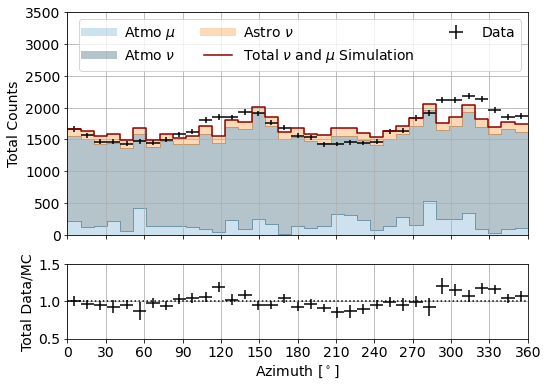

In [33]:
#lt = 3519.685 * 86400 
bins = 35
range=(0,360)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)

hb_data = hl.hist(np.degrees(exp.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, bins=bins,range=range)

hb_mc = hl.hist(np.degrees(mc.azi),
       weights = lt*param_dict['astro'] * mc.ow* (mc.trueE/1e5)**-param_dict['gamma'], log=False, bins=bins,  range=range)

hb_ss = hl.hist(np.degrees(snowstorm.azi).values, 
           weights = w_multiplier*lt*param_dict['astro'] * snowstorm.ow* (snowstorm.trueE/1e5)**(-1.*param_dict['gamma']), log=False,         
                bins = bins, range=range)

hb_corsika = hl.hist(np.degrees(mu_corsika.azi).values, 
                weights=(param_dict['CORSIKA']*(mu_corsika.weights)) , 
                bins = bins, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.azi).values, 
                weights=(param_dict['MuonGun']*(mu_muongun.weights)) , 
                bins = bins, range=range)

hb_atmo = hl.hist(np.degrees(mc.azi).values, 
                     weights = (param_dict['conv']* mc.weights_MCEq_H3a_sibyll2_3c_conv*mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv +
                      param_dict['prompt'] *mc.weights_MCEq_H3a_sibyll2_3c_pr * mc.weights_MCEq_H3a_sibyll2_3c_pr )* lt, 
                     log=False, bins=bins, range=range)

hb_t = hb_ss + hb_corsika + hb_muon + hb_atmo

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred') #colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')


hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo, hb_ss], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)
#ax2.fill_between(hb_t.centers[0],err_low, err_high, color=colors[1], alpha=0.4)
ax2.set_xlabel(r'Azimuth [$^\circ$]')
ax1.set_ylim(0,3500)
ax1.set_xticks(np.arange(0,360.1,30))
ax1.set_xlim(0,360)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=3)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
cy.plotting.saving(plot_dir , 'azimuth_datamc')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Total Counts')

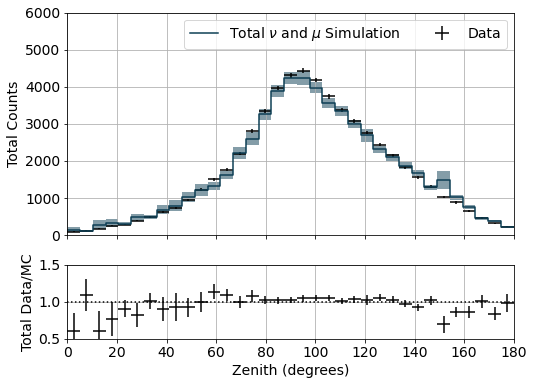

In [34]:
#lt = 3519.685 * 86400 
bins = 35
range = (0,180)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)

hb_data = hl.hist(np.degrees(exp.zen).values, bins=bins, range=range)

hb_mc = hl.hist(np.degrees(mc.zen),
       weights = lt*param_dict['astro'] * mc.ow* (mc.trueE/1e5)**-param_dict['gamma'], log=False, bins=bins,  range=range)

hb_ss = hl.hist(np.degrees(snowstorm.zen).values, 
           weights = w_multiplier*lt*param_dict['astro'] * snowstorm.ow* (snowstorm.trueE/1e5)**(-1.*param_dict['gamma']), log=False,         
                bins = bins, range=range)

hb_corsika = hl.hist(np.degrees(mu_corsika.zen).values, 
                weights=(param_dict['CORSIKA']*(mu_corsika.weights)) , 
                bins = bins, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.zen).values, 
                weights=(param_dict['MuonGun']*(mu_muongun.weights)) , 
                bins = bins, range=range)

hb_atmo = hl.hist(np.degrees(mc.zen).values, 
                     weights = (param_dict['conv']* mc.weights_MCEq_H3a_sibyll2_3c_conv*mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv +
                      param_dict['prompt'] *mc.weights_MCEq_H3a_sibyll2_3c_pr * mc.weights_MCEq_H3a_sibyll2_3c_pr )* lt, 
                     log=False, bins=bins, range=range)

hb_t = hb_ss+ hb_corsika + hb_muon + hb_atmo

hl.plot1d(ax1, hb_t, errorbands=True, label=r'Total $\nu$ and $\mu$ Simulation', color=colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')
ax2.set_xlabel(r'Zenith (degrees)')
ax1.set_ylim(0,6000)
ax1.set_ylim(0)
ax1.set_xlim(0,180)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
#cy.plotting.saving(plot_dir , 'azimuth_datamc')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/plots/paperplots/fig_data_mc//coszen_datamc


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


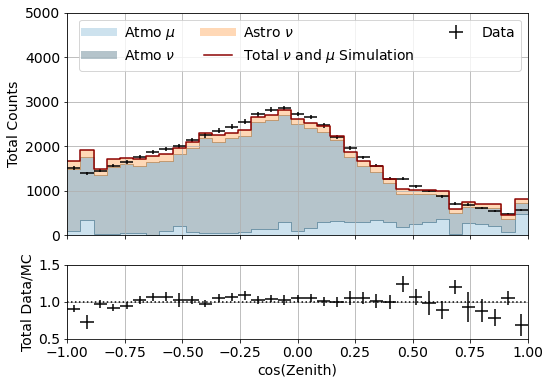

In [35]:
#lt = 3519.685 * 86400 
bins = 35
range = (-1,1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)

hb_data = hl.hist(np.cos(exp.zen).values, bins=bins, range=range)

hb_mc = hl.hist(np.cos(mc.zen),
       weights = lt*param_dict['astro'] * mc.ow* (mc.trueE/1e5)**-param_dict['gamma'], log=False, bins=bins,  range=range)

hb_ss = hl.hist(np.cos(snowstorm.zen).values, 
           weights = w_multiplier*lt*param_dict['astro'] * snowstorm.ow* (snowstorm.trueE/1e5)**(-1.*param_dict['gamma']), log=False,         
                bins = bins, range=range)
hb_hans= hl.hist(np.cos(snowstorm.zen).values, 
           weights = w_multiplier*lt*snowstorm.weights_cscd_hans, bins=bins, range=range, log=False)
hb_corsika = hl.hist(np.cos(mu_corsika.zen).values, 
                weights=(param_dict['CORSIKA']*(mu_corsika.weights)) , 
                bins = bins, range=range)

hb_muon = hl.hist(np.cos(mu_muongun.zen).values, 
                weights=(param_dict['MuonGun']*(mu_muongun.weights)) , 
                bins = bins, range=range)

hb_atmo = hl.hist(np.cos(mc.zen).values, 
                     weights = (param_dict['conv']* mc.weights_MCEq_H3a_sibyll2_3c_conv*mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv +
                      param_dict['prompt'] *mc.weights_MCEq_H3a_sibyll2_3c_pr * mc.weights_MCEq_H3a_sibyll2_3c_pr )* lt, 
                     log=False, bins=bins, range=range)

hb_t = hb_ss+ hb_corsika + hb_muon + hb_atmo

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred')
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')

hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo, hb_ss], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)


ax2.set_xlabel(r'cos(Zenith)')
ax1.set_ylim(0,5000)
ax1.set_ylim(0)
ax1.set_xlim(0-1,1)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=3)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
cy.plotting.saving(plot_dir , 'coszen_datamc')

In [36]:
hb_hans = hl.hist(np.cos(mc.zen),
       weights =lt* mc.weights_cscd_hans, log=False, bins=bins,  range=range)

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [37]:
total = hb_ss + hb_corsika + hb_muon + hb_atmo
print(hb_data.sum() / total.sum())
print(hb_ss.sum()/ total.sum())
print((hb_corsika.sum() + hb_muon.sum())/ total.sum())
print(hb_atmo.sum()/ total.sum())

Hist(with value 1.004582803649927)
Hist(with value 0.06967973736721825)
Hist(with value 0.1040699555361459)
Hist(with value 0.8262503070966358)


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/plots/paperplots/fig_data_mc//angerr_datamc


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


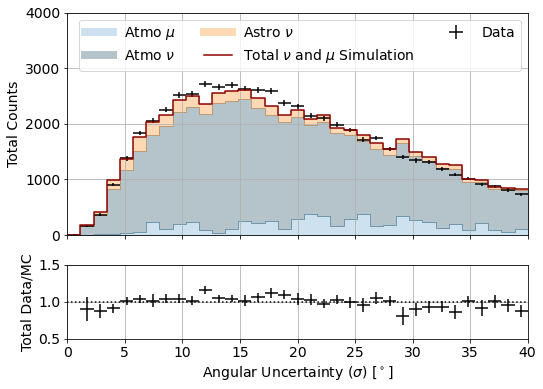

In [38]:
#lt = 3519.685 * 86400 
bins = 35
range = (0,40)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)

hb_data = hl.hist(np.degrees(exp.angErr).values, bins=bins, range=range)

hb_mc = hl.hist(np.degrees(mc.angErr),
       weights = lt*param_dict['astro'] * mc.ow* (mc.trueE/1e5)**-param_dict['gamma'], log=False, bins=bins,  range=range)

hb_ss = hl.hist(np.degrees(snowstorm.angErr).values, 
           weights = w_multiplier*lt*param_dict['astro'] * snowstorm.ow* (snowstorm.trueE/1e5)**(-1.*param_dict['gamma']), log=False,         
                bins = bins, range=range)

hb_corsika = hl.hist(np.degrees(mu_corsika.angErr).values, 
                weights=((mu_corsika.weights)) , 
                bins = bins, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.angErr).values, 
                weights=((mu_muongun.weights)) , 
                bins = bins, range=range)

hb_atmo = hl.hist(np.degrees(mc.angErr).values, 
                     weights = (param_dict['conv']* mc.weights_MCEq_H3a_sibyll2_3c_conv*mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv +
                      param_dict['prompt'] *mc.weights_MCEq_H3a_sibyll2_3c_pr * mc.weights_MCEq_H3a_sibyll2_3c_pr )* lt, 
                     log=False, bins=bins, range=range)

hb_t = hb_ss+ hb_corsika + hb_muon + hb_atmo
hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo, hb_ss], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred' ) #(colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')
ax2.set_xlabel(r'Angular Uncertainty ($\sigma$) [$^\circ$]')
ax1.set_ylim(0,4000)
ax1.set_ylim(0)
ax1.set_xlim(0,40)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=3)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
cy.plotting.saving(plot_dir , 'angerr_datamc')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Total Counts')

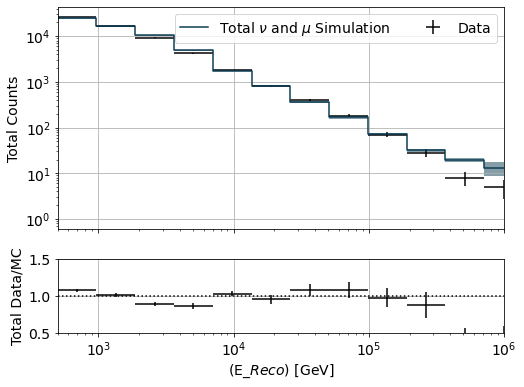

In [39]:
#lt = 3519.685 * 86400 
bins = 15
range = (500,1e7)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)

hb_data = hl.hist((exp.energy).values, bins=bins, range=range, log=True)

hb_mc = hl.hist((mc.energy),
       weights = lt*param_dict['astro'] * mc.ow* (mc.trueE/1e5)**-param_dict['gamma'], log=True, bins=bins,  range=range)

hb_ss = hl.hist((snowstorm.energy).values, 
           weights = w_multiplier*lt*param_dict['astro'] * snowstorm.ow* (snowstorm.trueE/1e5)**(-1.*param_dict['gamma']), log=True,         
                bins = bins, range=range)

hb_corsika = hl.hist((mu_corsika.energy).values, 
                weights=((mu_corsika.weights)) , 
                bins = bins, range=range, log=True)

hb_muon = hl.hist((mu_muongun.energy).values, 
                weights=((mu_muongun.weights)) , 
                bins = bins, range=range, log=True)

hb_atmo = hl.hist((mc.energy).values, 
                     weights = (param_dict['conv']* mc.weights_MCEq_H3a_sibyll2_3c_conv*mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv +
                      param_dict['prompt'] *mc.weights_MCEq_H3a_sibyll2_3c_pr * mc.weights_MCEq_H3a_sibyll2_3c_pr )* lt, 
                     log=True, bins=bins, range=range)

hb_t = hb_ss+ hb_corsika + hb_muon + hb_atmo
ax1.loglog()
ax2.semilogx()
hl.plot1d(ax1, hb_t, errorbands=True, label=r'Total $\nu$ and $\mu$ Simulation', color=colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')
ax2.set_xlabel(r'(E_${Reco}$) [GeV]')
#ax1.set_ylim(0,4000)
ax1.set_ylim(0)
ax1.set_xlim(500,1e6)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
#cy.plotting.saving(plot_dir , 'azimuth_datamc')